In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data = pd.read_csv("daily_minimum_temperatures.csv", sep=",")
print(data.shape)
data.head()

(3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


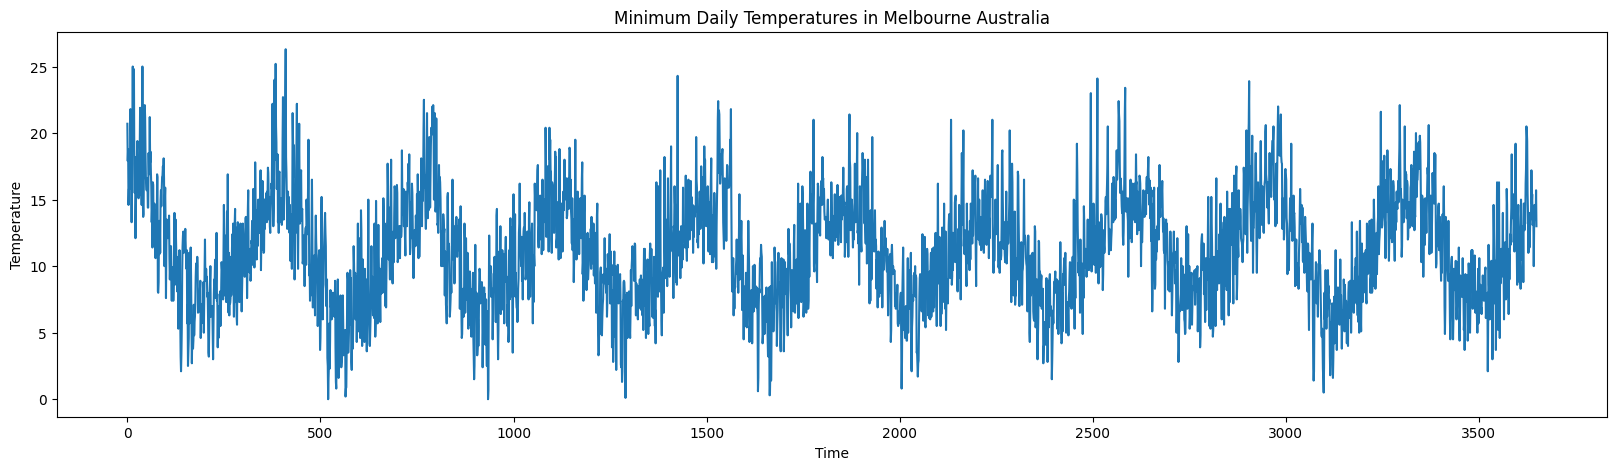

In [3]:
plt.figure(figsize = [20,5])
plt.plot(data.Temp)
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

In [4]:
train_percentage = 0.67
train_size = int(len(data)*train_percentage)

train = data[:train_size]
test = data[train_size:]
train = train.rename(columns={'Date': 'ds', 'Temp': 'y'}) #columns names: "ds" and "y" https://facebook.github.io/prophet/docs/quick_start.html#python-api
test = test.rename(columns={'Date': 'ds', 'Temp': 'y'})
print(train.shape)
train.head()

(2445, 2)


,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
prophet_basic = Prophet()
#prophet_basic.add_regressor('anther_variable_x1') #si queres agregar otras variables para realizar la predicción
#prophet_basic.add_regressor('anther_variable_x2')
prophet_basic.fit(train)

14:18:20 - cmdstanpy - INFO - Chain [1] start processing
14:18:21 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
predictions = prophet_basic.make_future_dataframe(periods=test.shape[0]+1)
predictions.tail(2)

,ds
3649,1990-12-30
3650,1990-12-31


In [7]:
predictions = prophet_basic.predict(predictions)
predictions.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3646,1990-12-27,10.330504,9.733216,16.937994,9.716820,10.911046,3.108295,3.108295,3.108295,-0.163924,-0.163924,-0.163924,3.272218,3.272218,3.272218,0.0,0.0,0.0,13.438799
3647,1990-12-28,10.330208,9.864571,17.097143,9.715531,10.911545,3.317315,3.317315,3.317315,-0.032489,-0.032489,-0.032489,3.349804,3.349804,3.349804,0.0,0.0,0.0,13.647523
3648,1990-12-29,10.329912,10.094612,17.230701,9.714242,10.912045,3.385791,3.385791,3.385791,-0.037620,-0.037620,-0.037620,3.423411,3.423411,3.423411,0.0,0.0,0.0,13.715703
3649,1990-12-30,10.329615,10.183495,17.225270,9.712954,10.912530,3.299949,3.299949,3.299949,-0.192041,-0.192041,-0.192041,3.491990,3.491990,3.491990,0.0,0.0,0.0,13.629564
3650,1990-12-31,10.329319,10.428104,17.412828,9.711665,10.912699,3.608671,3.608671,3.608671,0.054072,0.054072,0.054072,3.554599,3.554599,3.554599,0.0,0.0,0.0,13.937991


In [8]:
predictions[["ds", "yhat"]].dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [9]:
test['ds'] = pd.to_datetime(test['ds'])
results = pd.merge(test, predictions[["ds", "yhat"]], on = ["ds"], how='left')

In [10]:
results.tail()

,ds,y,yhat
1200,1990-12-27,14.0,13.438799
1201,1990-12-28,13.6,13.647523
1202,1990-12-29,13.5,13.715703
1203,1990-12-30,15.7,13.629564
1204,1990-12-31,13.0,13.937991


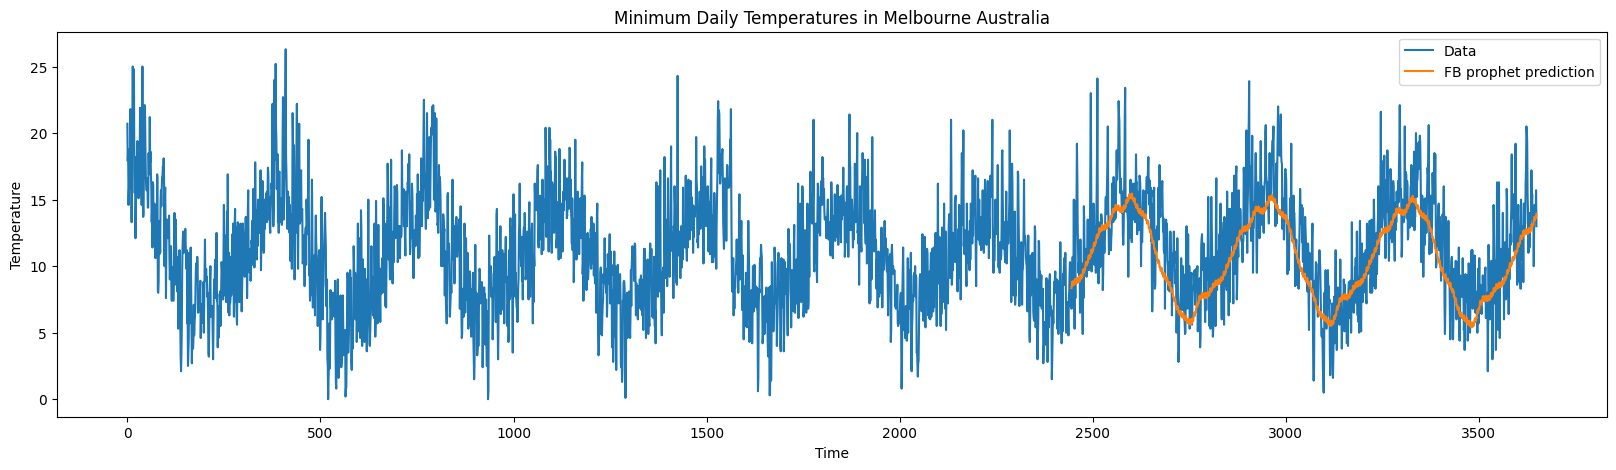

In [11]:
index_start = len(train)
index_end = len(train) + len(test)
plt.figure(figsize = [20,5])
plt.plot(data.Temp, label="Data")
plt.plot(range(index_start, index_end), results.yhat.values, label="FB prophet prediction")
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

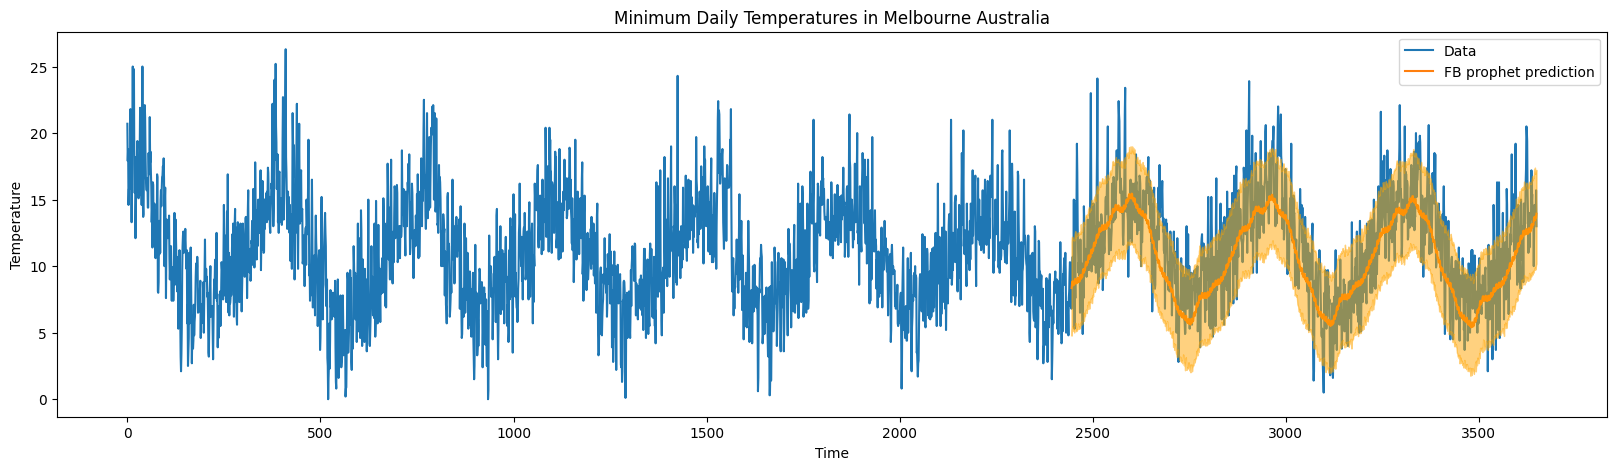

In [12]:
plt.figure(figsize = [20,5])
plt.plot(data.Temp, label="Data", zorder = 1)
plt.plot(range(index_start, index_end), results.yhat.values, label="FB prophet prediction", zorder = 2)
plt.fill_between(range(len(train), len(train) + len(test)), predictions.yhat_lower.values[index_start:index_end], predictions.yhat_upper.values[index_start:index_end], alpha=0.5, color ="orange", zorder = 3)
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [13]:
mean_squared_error(results.y, results.yhat)

8.290018365344817